In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
matches = pd.read_csv("E:/BTL/KHDL/matches_after_preprocessing.csv", index_col=0)

In [3]:
matches = matches.fillna(0)


matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result"] == "W").astype("int")

In [4]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek

In [5]:
data = matches

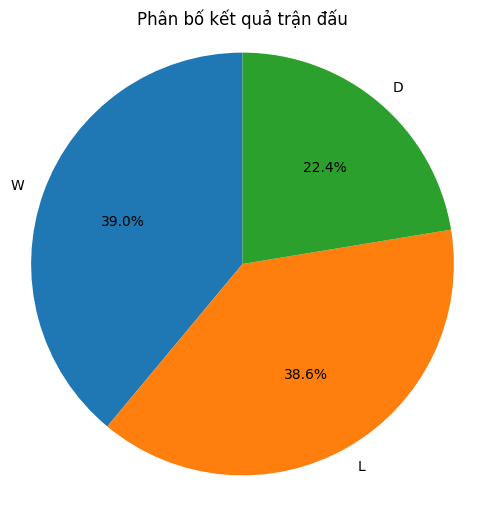

In [6]:
result_counts = data['result'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố kết quả trận đấu')
plt.axis('equal')
plt.show()

In [7]:
# Lấy mẫu ngẫu nhiên 500 hàng từ tập dữ liệu
sample_df = data.sample(n=500)

# Tính toán thống kê tổng quan của dữ liệu
summary_stats = data.describe()

In [8]:
summary_stats

,date,gf,ga,xg,xga,poss,attendance,sh,sot,dist,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
count,2598,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,...,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000
mean,2022-05-03 06:17:27.575057920,1.412240,1.403002,1.379600,1.373172,50.075058,28898.369900,12.538876,4.193226,17.302656,...,16.188222,4.387606,1.413267,1.403002,12.507955,4.180139,17.331165,0.426739,0.115217,0.142289
min,2020-10-03 00:00:00,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.000000,0.000000,0.000000,3.333333,0.000000,10.400000,0.000000,0.000000,0.000000
25%,2021-05-15 00:00:00,0.000000,0.000000,0.725000,0.700000,40.000000,500.000000,8.000000,2.000000,15.400000,...,15.000000,4.000000,0.666667,0.666667,10.000000,3.000000,16.100000,0.000000,0.000000,0.000000
50%,2022-04-09 00:00:00,1.000000,1.000000,1.300000,1.200000,50.000000,30546.000000,12.000000,4.000000,17.200000,...,15.000000,5.000000,1.333333,1.333333,12.333333,4.000000,17.233333,0.333333,0.000000,0.000000
75%,2023-03-11 00:00:00,2.000000,2.000000,1.800000,1.800000,60.000000,50120.250000,16.000000,6.000000,19.100000,...,19.000000,6.000000,2.000000,2.000000,14.666667,5.000000,18.466667,0.666667,0.333333,0.333333
max,2024-01-02 00:00:00,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,34.000000,15.000000,39.900000,...,20.000000,6.000000,5.666667,5.333333,26.666667,11.666667,31.100000,2.333333,1.666667,1.666667
std,NaN,1.292657,1.290506,0.818128,0.816833,12.738451,22365.057309,5.473905,2.416810,3.041870,...,2.495970,1.821520,0.828554,0.780860,3.585412,1.544769,1.894555,0.373925,0.195531,0.216901


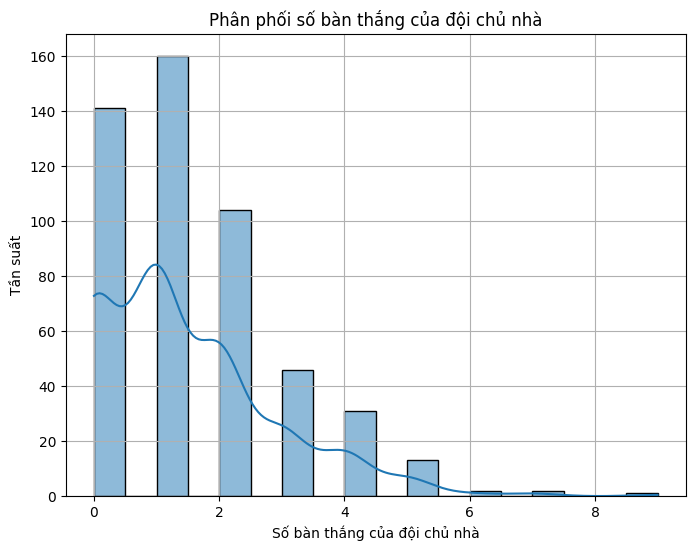

In [9]:
# Trực quan hóa phân phối của số bàn thắng của đội chủ nhà
plt.figure(figsize=(8, 6))
sns.histplot(sample_df['gf'], kde=True)
plt.xlabel('Số bàn thắng của đội chủ nhà')
plt.ylabel('Tần suất')
plt.title('Phân phối số bàn thắng của đội chủ nhà')
plt.grid(True)
plt.show()

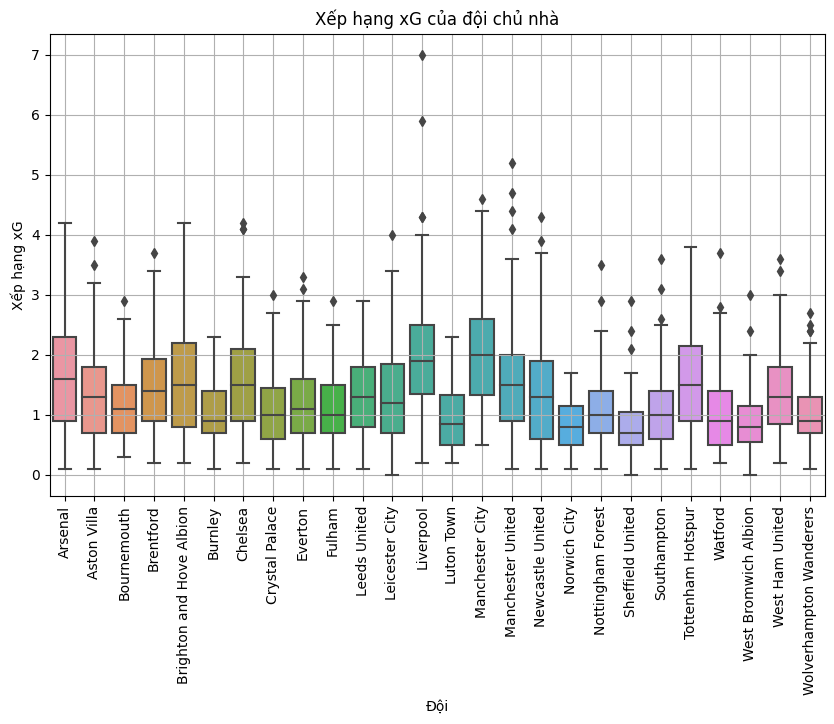

In [10]:
# Trực quan hóa biểu đồ boxplot cho xếp hạng xG của đội chủ nhà theo giải đấu
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='team', y='xg')
plt.xlabel('Đội')
plt.ylabel('Xếp hạng xG')
plt.title('Xếp hạng xG của đội chủ nhà')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

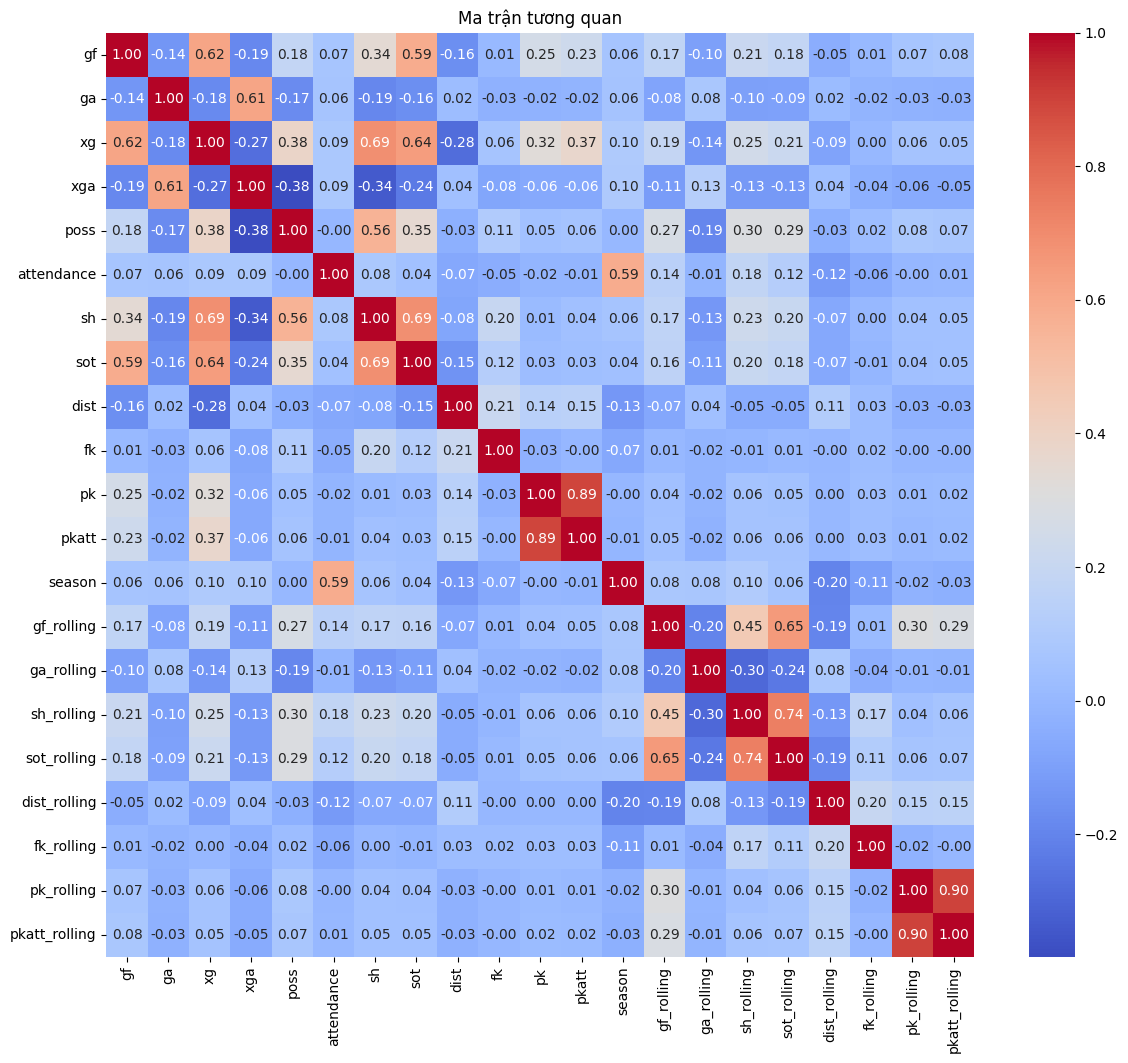

In [11]:
# Sử dụng biểu đồ heatmap để hiển thị ma trận tương quan giữa các biến
# Chọn các cột có kiểu dữ liệu số học (float hoặc int)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Tính ma trận tương quan cho các cột số học
corr_matrix = numeric_data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.title('Ma trận tương quan')
plt.show()

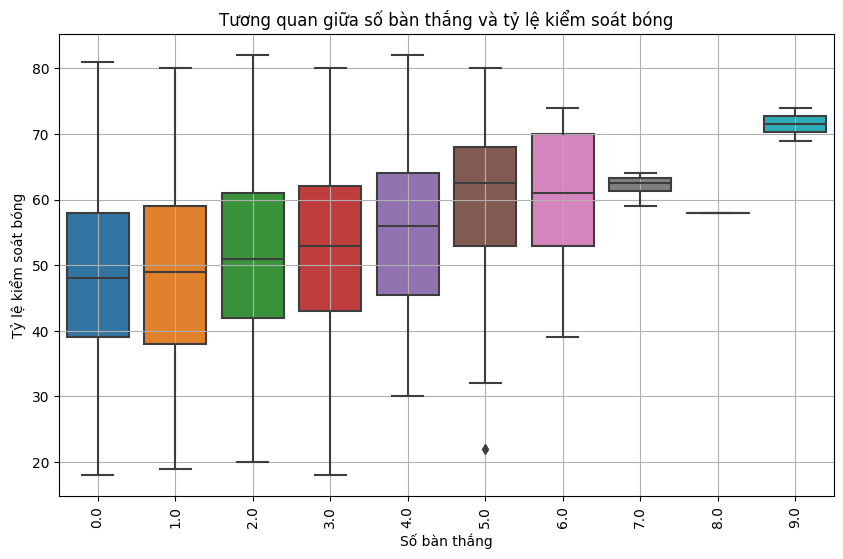

In [12]:
# Tạo biểu đồ barplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=matches, x='gf', y='poss')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Số bàn thắng')
plt.ylabel('Tỷ lệ kiểm soát bóng')
plt.title('Tương quan giữa số bàn thắng và tỷ lệ kiểm soát bóng')

plt.xticks(rotation=90)
plt.grid(True)
plt.show()

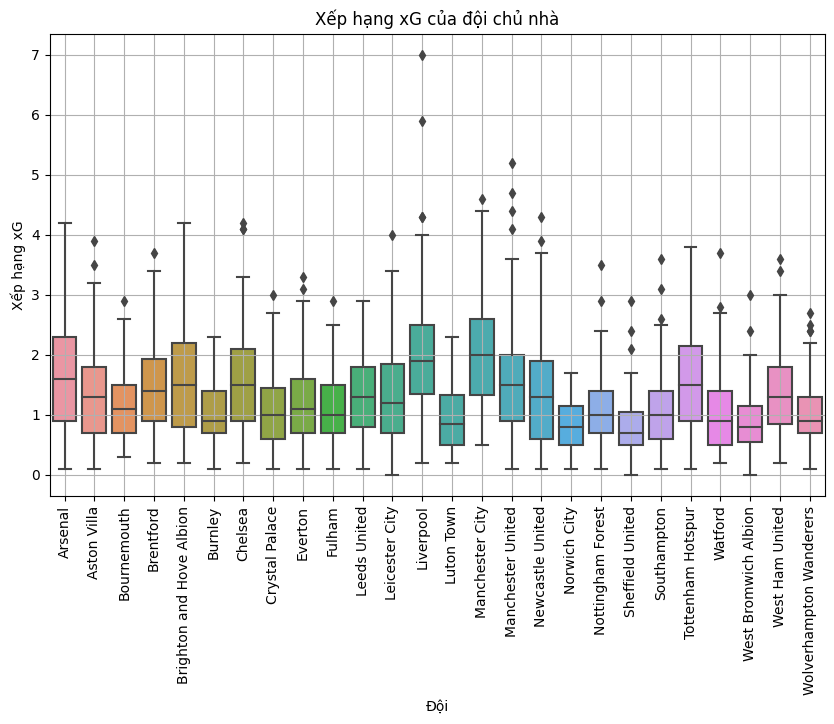

In [13]:
# Trực quan hóa biểu đồ boxplot cho xếp hạng xG của đội chủ nhà theo giải đấu
plt.figure(figsize=(10, 6))
sns.boxplot(data=matches, x='team', y='xg')
plt.xlabel('Đội')
plt.ylabel('Xếp hạng xG')
plt.title('Xếp hạng xG của đội chủ nhà')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

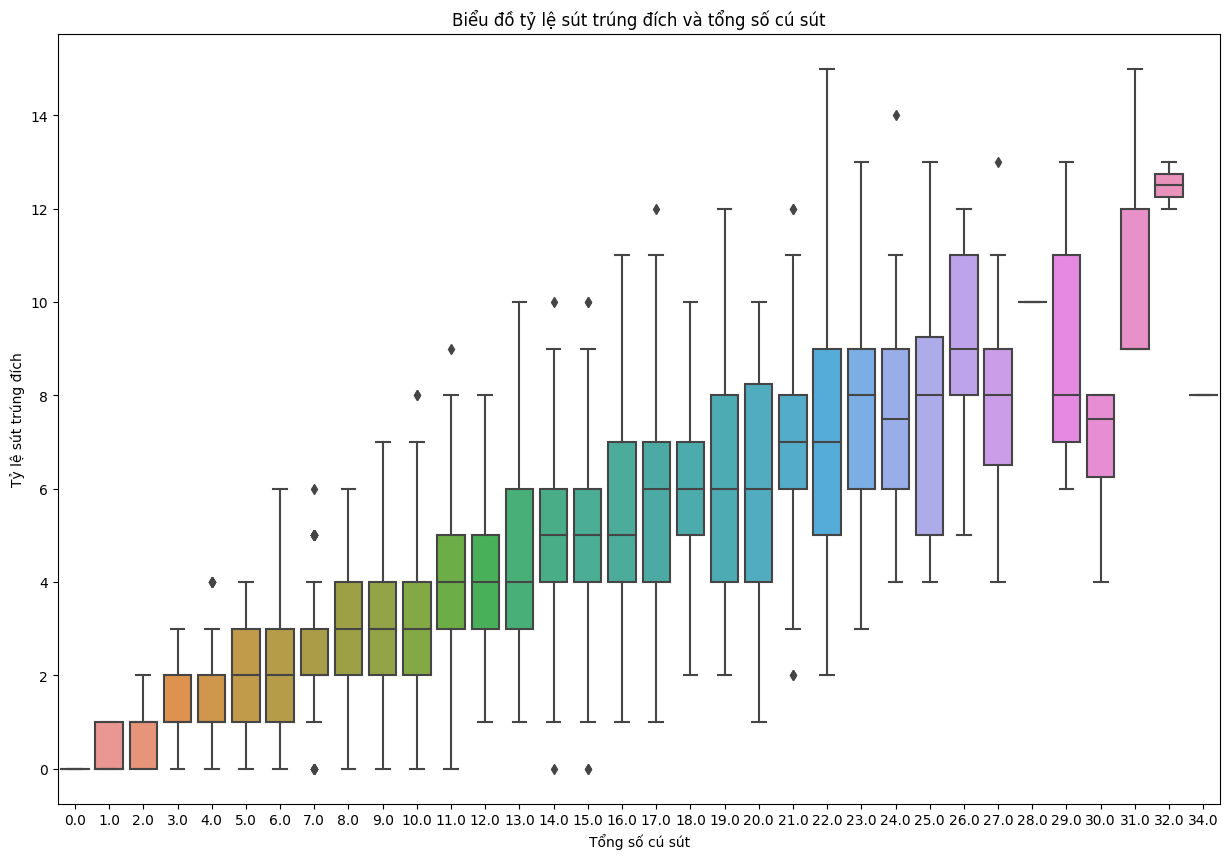

In [14]:
# Tạo biểu đồ hộp
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='sh', y='sot')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Tổng số cú sút')
plt.ylabel('Tỷ lệ sút trúng đích')
plt.title('Biểu đồ tỷ lệ sút trúng đích và tổng số cú sút')

# Hiển thị biểu đồ
plt.show()

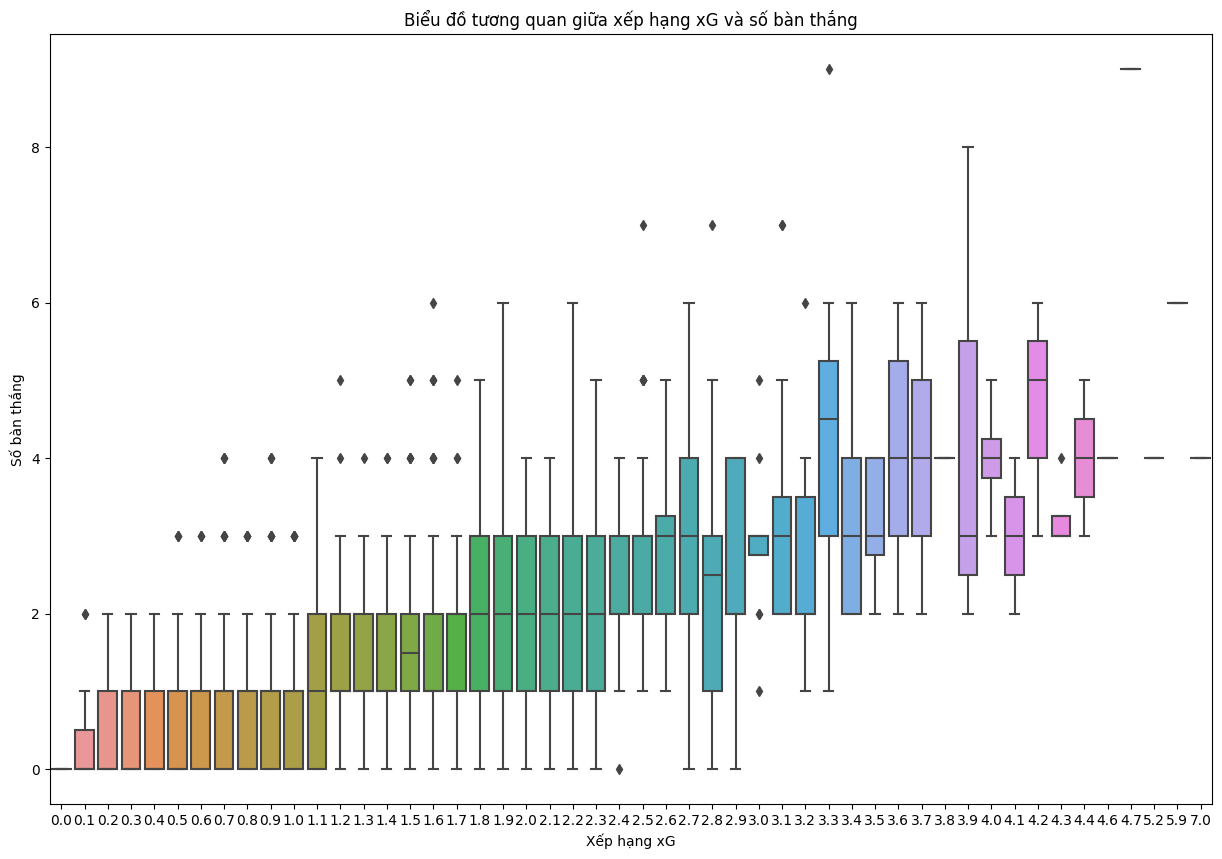

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='xg', y='gf')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Xếp hạng xG')
plt.ylabel('Số bàn thắng')
plt.title('Biểu đồ tương quan giữa xếp hạng xG và số bàn thắng')

# Hiển thị biểu đồ
plt.show()

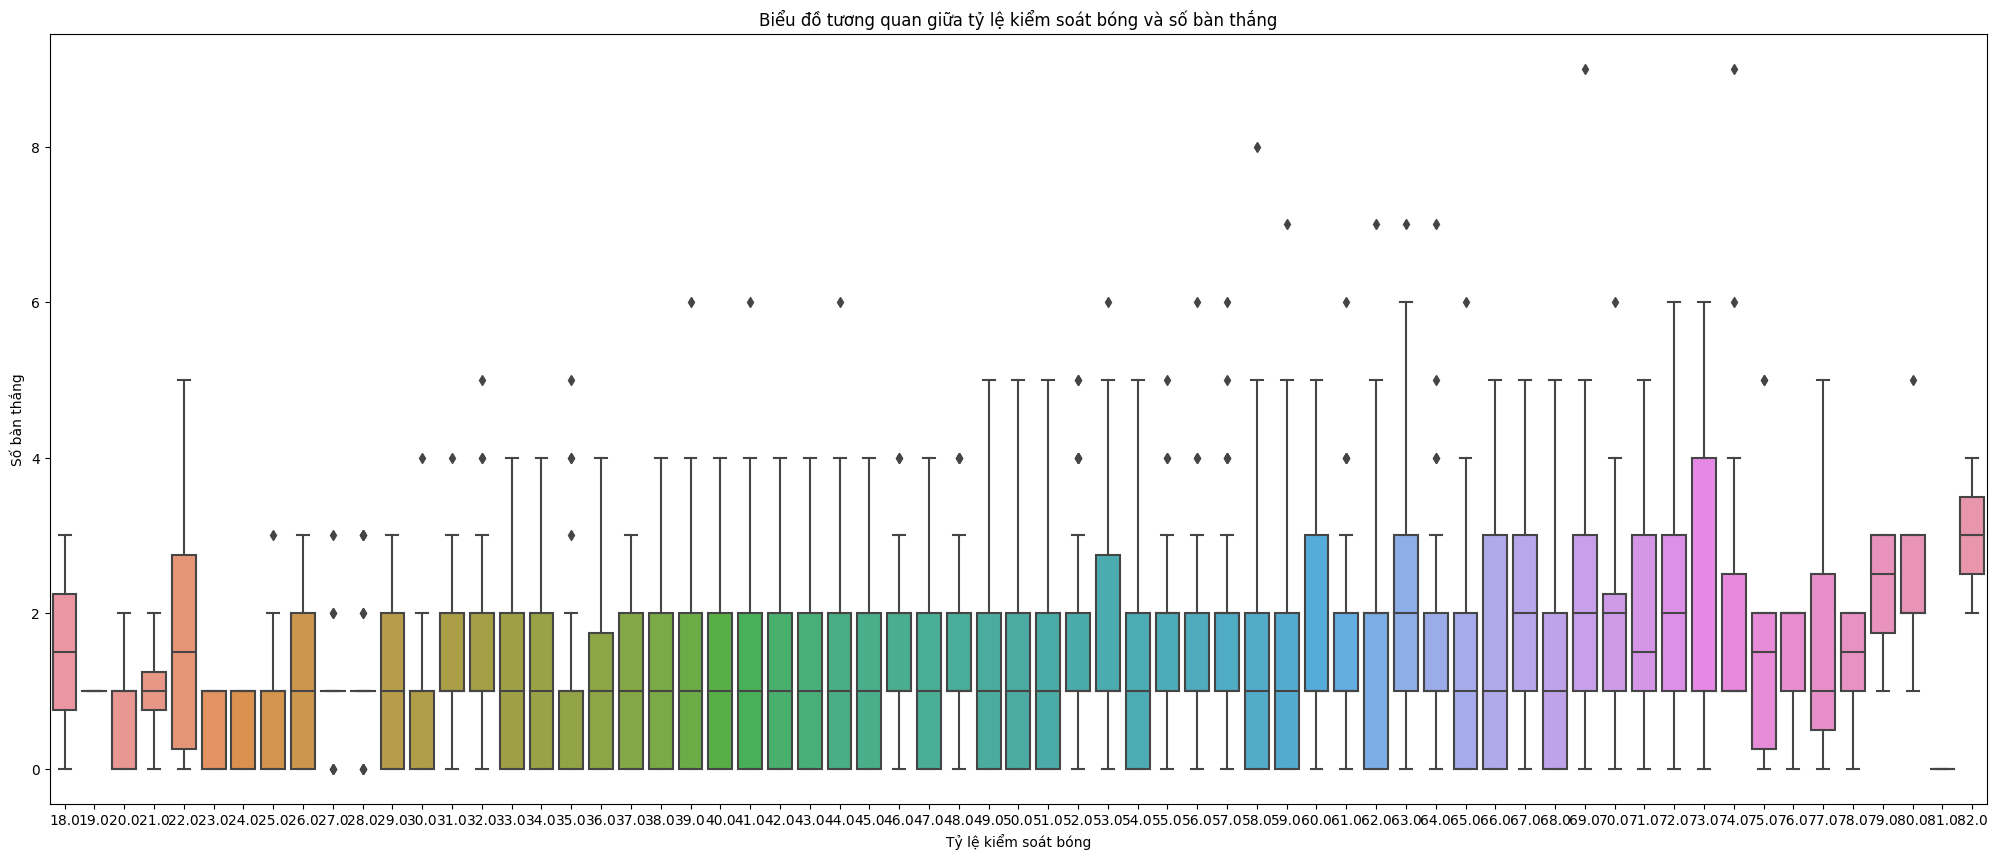

In [16]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=data, x='poss', y='gf')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Tỷ lệ kiểm soát bóng')
plt.ylabel('Số bàn thắng')
plt.title('Biểu đồ tương quan giữa tỷ lệ kiểm soát bóng và số bàn thắng')

# Hiển thị biểu đồ
plt.show()

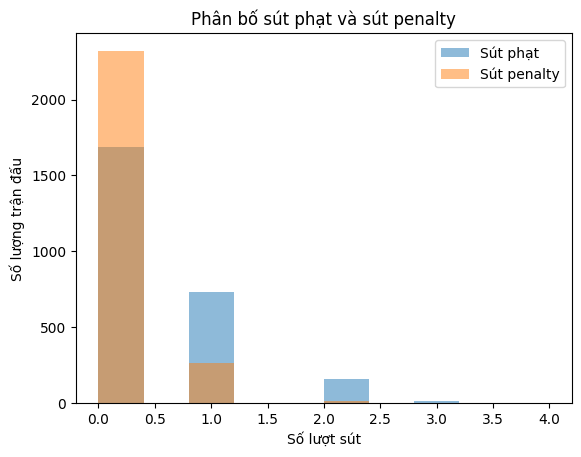

In [17]:
data[['fk', 'pk']].plot.hist(alpha=0.5, bins=10)
plt.xlabel('Số lượt sút')
plt.ylabel('Số lượng trận đấu')
plt.title('Phân bố sút phạt và sút penalty')
plt.legend(['Sút phạt', 'Sút penalty'])
plt.show()

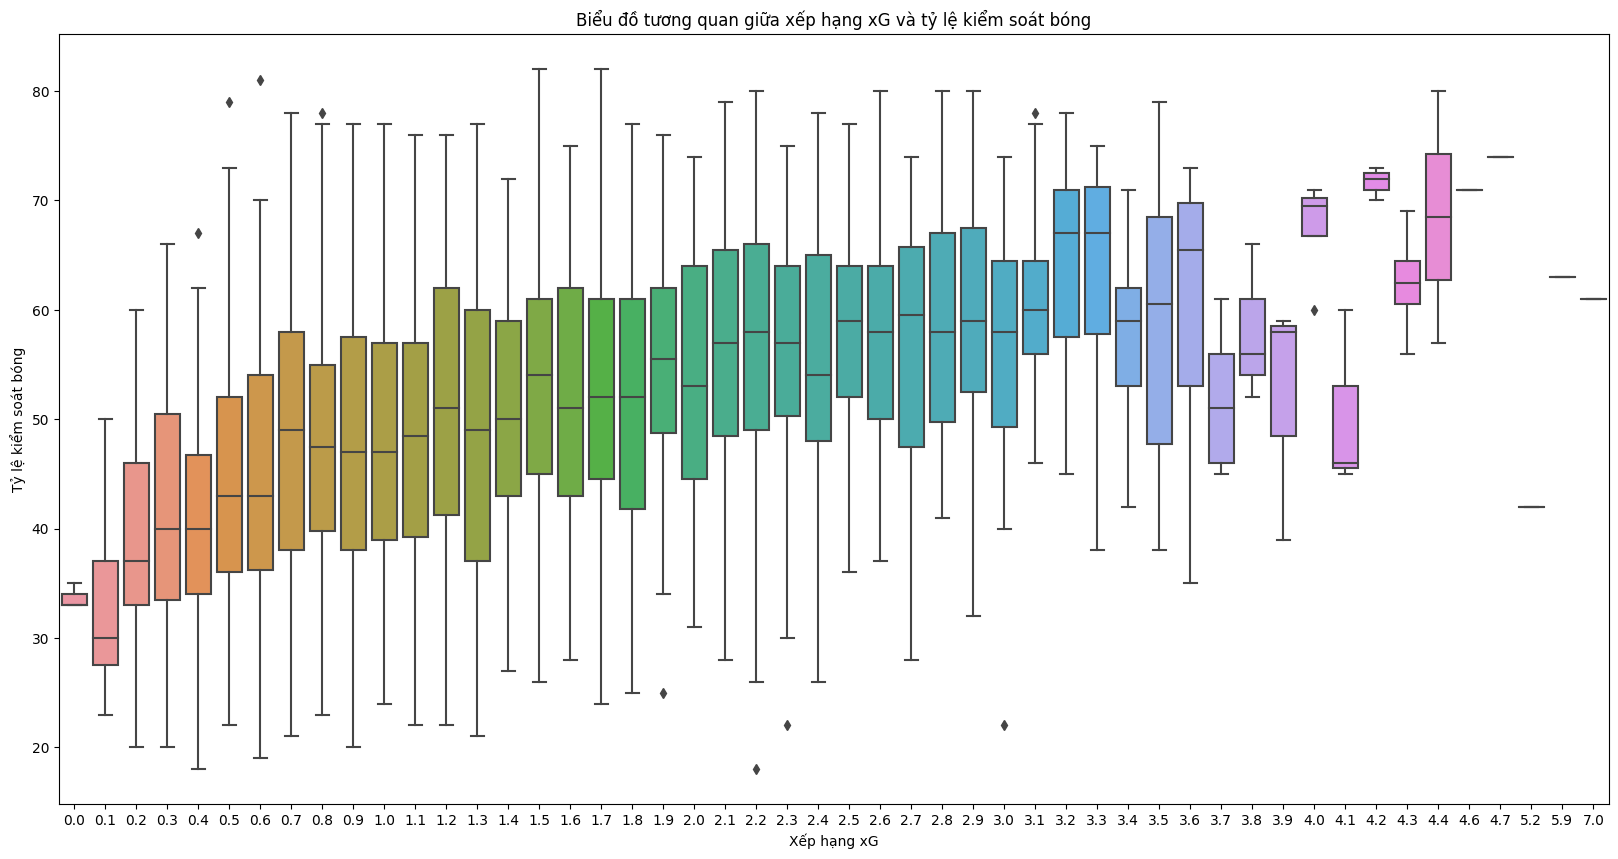

In [18]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x='xg', y='poss')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Xếp hạng xG')
plt.ylabel('Tỷ lệ kiểm soát bóng')
plt.title('Biểu đồ tương quan giữa xếp hạng xG và tỷ lệ kiểm soát bóng')

# Hiển thị biểu đồ
plt.show()

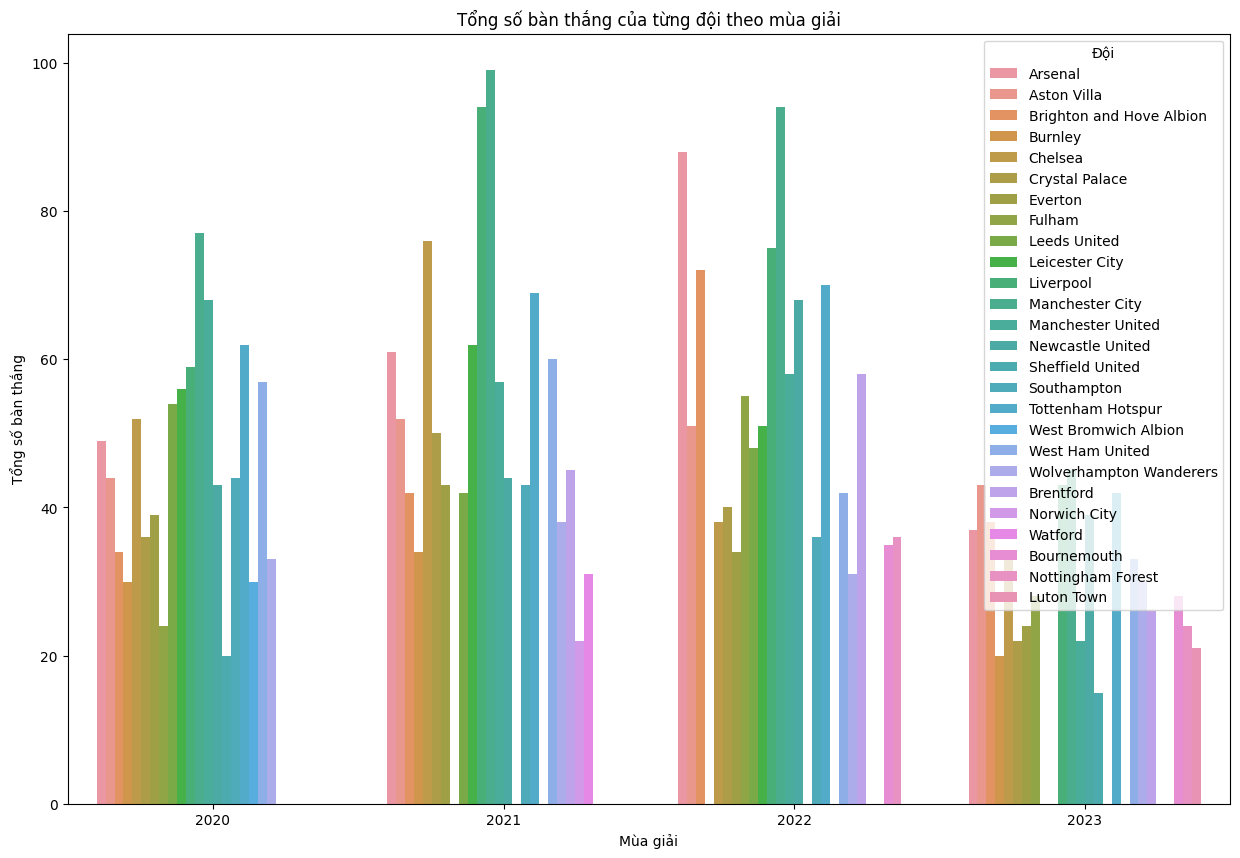

In [19]:
# # Điền NaN trong cột 'season' bằng giá trị mode (giá trị xuất hiện nhiều nhất)
# mode_season = data['season'].mode()[0]  # Lấy giá trị mode
# data['season'].fillna(mode_season, inplace=True)

# # Điền NaN trong cột 'gf' bằng giá trị trung bình (mean)
# mean_gf = data['gf'].mean()  # Lấy giá trị trung bình
# data['gf'].fillna(mean_gf, inplace=True)

# # Điền NaN trong cột 'team' bằng giá trị đặc biệt hoặc giá trị mặc định nếu cần
# default_team_value = 'Unknown'  # Giá trị mặc định bạn muốn sử dụng
# data['team'].fillna(default_team_value, inplace=True)

# Tính tổng số bàn thắng của từng đội theo mùa giải
goals_by_team = data.groupby(['season', 'team'])['gf'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))
sns.barplot(data=goals_by_team, x='season', y='gf', hue='team')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Mùa giải')
plt.ylabel('Tổng số bàn thắng')
plt.title('Tổng số bàn thắng của từng đội theo mùa giải')

# Hiển thị biểu đồ
plt.legend(title='Đội')
plt.show()

In [20]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.6,...,14,6,2.000000,1.333333,8.000000,3.666667,14.633333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,...,17,5,1.666667,1.666667,5.666667,3.666667,15.366667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.7,...,19,6,1.000000,1.666667,7.000000,3.666667,16.566667,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.0,...,16,6,0.666667,1.000000,9.666667,4.000000,16.566667,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,...,19,6,0.333333,0.666667,9.666667,2.666667,19.333333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,2023-12-09,15:00,Matchweek 16,Sat,Home,D,1.0,1.0,Nott'ham Forest,1.2,...,15,5,1.333333,1.666667,7.333333,4.000000,14.400000,0.333333,0.333333,0.333333
2594,2023-12-17,14:00,Matchweek 17,Sun,Away,L,0.0,3.0,West Ham,0.7,...,14,6,1.000000,1.000000,7.666667,3.666667,13.933333,0.333333,0.000000,0.000000
2595,2023-12-24,13:00,Matchweek 18,Sun,Home,W,2.0,1.0,Chelsea,1.3,...,13,6,0.666667,1.333333,10.333333,3.666667,17.166667,0.333333,0.000000,0.000000
2596,2023-12-27,19:30,Matchweek 19,Wed,Away,W,4.0,1.0,Brentford,2.4,...,19,2,1.000000,1.666667,12.666667,4.333333,17.466667,0.333333,0.000000,0.000000


In [21]:
matches.info

<bound method DataFrame.info of            date   time         round  day venue result   gf   ga   
0    2020-10-04  14:00   Matchweek 4  Sun  Home      W  2.0  1.0  \
1    2020-10-17  17:30   Matchweek 5  Sat  Away      L  0.0  1.0   
2    2020-10-25  19:15   Matchweek 6  Sun  Home      L  0.0  1.0   
3    2020-11-01  16:30   Matchweek 7  Sun  Away      W  1.0  0.0   
4    2020-11-08  19:15   Matchweek 8  Sun  Home      L  0.0  3.0   
...         ...    ...           ...  ...   ...    ...  ...  ...   
2593 2023-12-09  15:00  Matchweek 16  Sat  Home      D  1.0  1.0   
2594 2023-12-17  14:00  Matchweek 17  Sun  Away      L  0.0  3.0   
2595 2023-12-24  13:00  Matchweek 18  Sun  Home      W  2.0  1.0   
2596 2023-12-27  19:30  Matchweek 19  Wed  Away      W  4.0  1.0   
2597 2023-12-30  15:00  Matchweek 20  Sat  Home      W  3.0  0.0   

             opponent   xg  ...  hour  day_code  gf_rolling ga_rolling   
0       Sheffield Utd  0.6  ...    14         6    2.000000   1.333333  \
1  

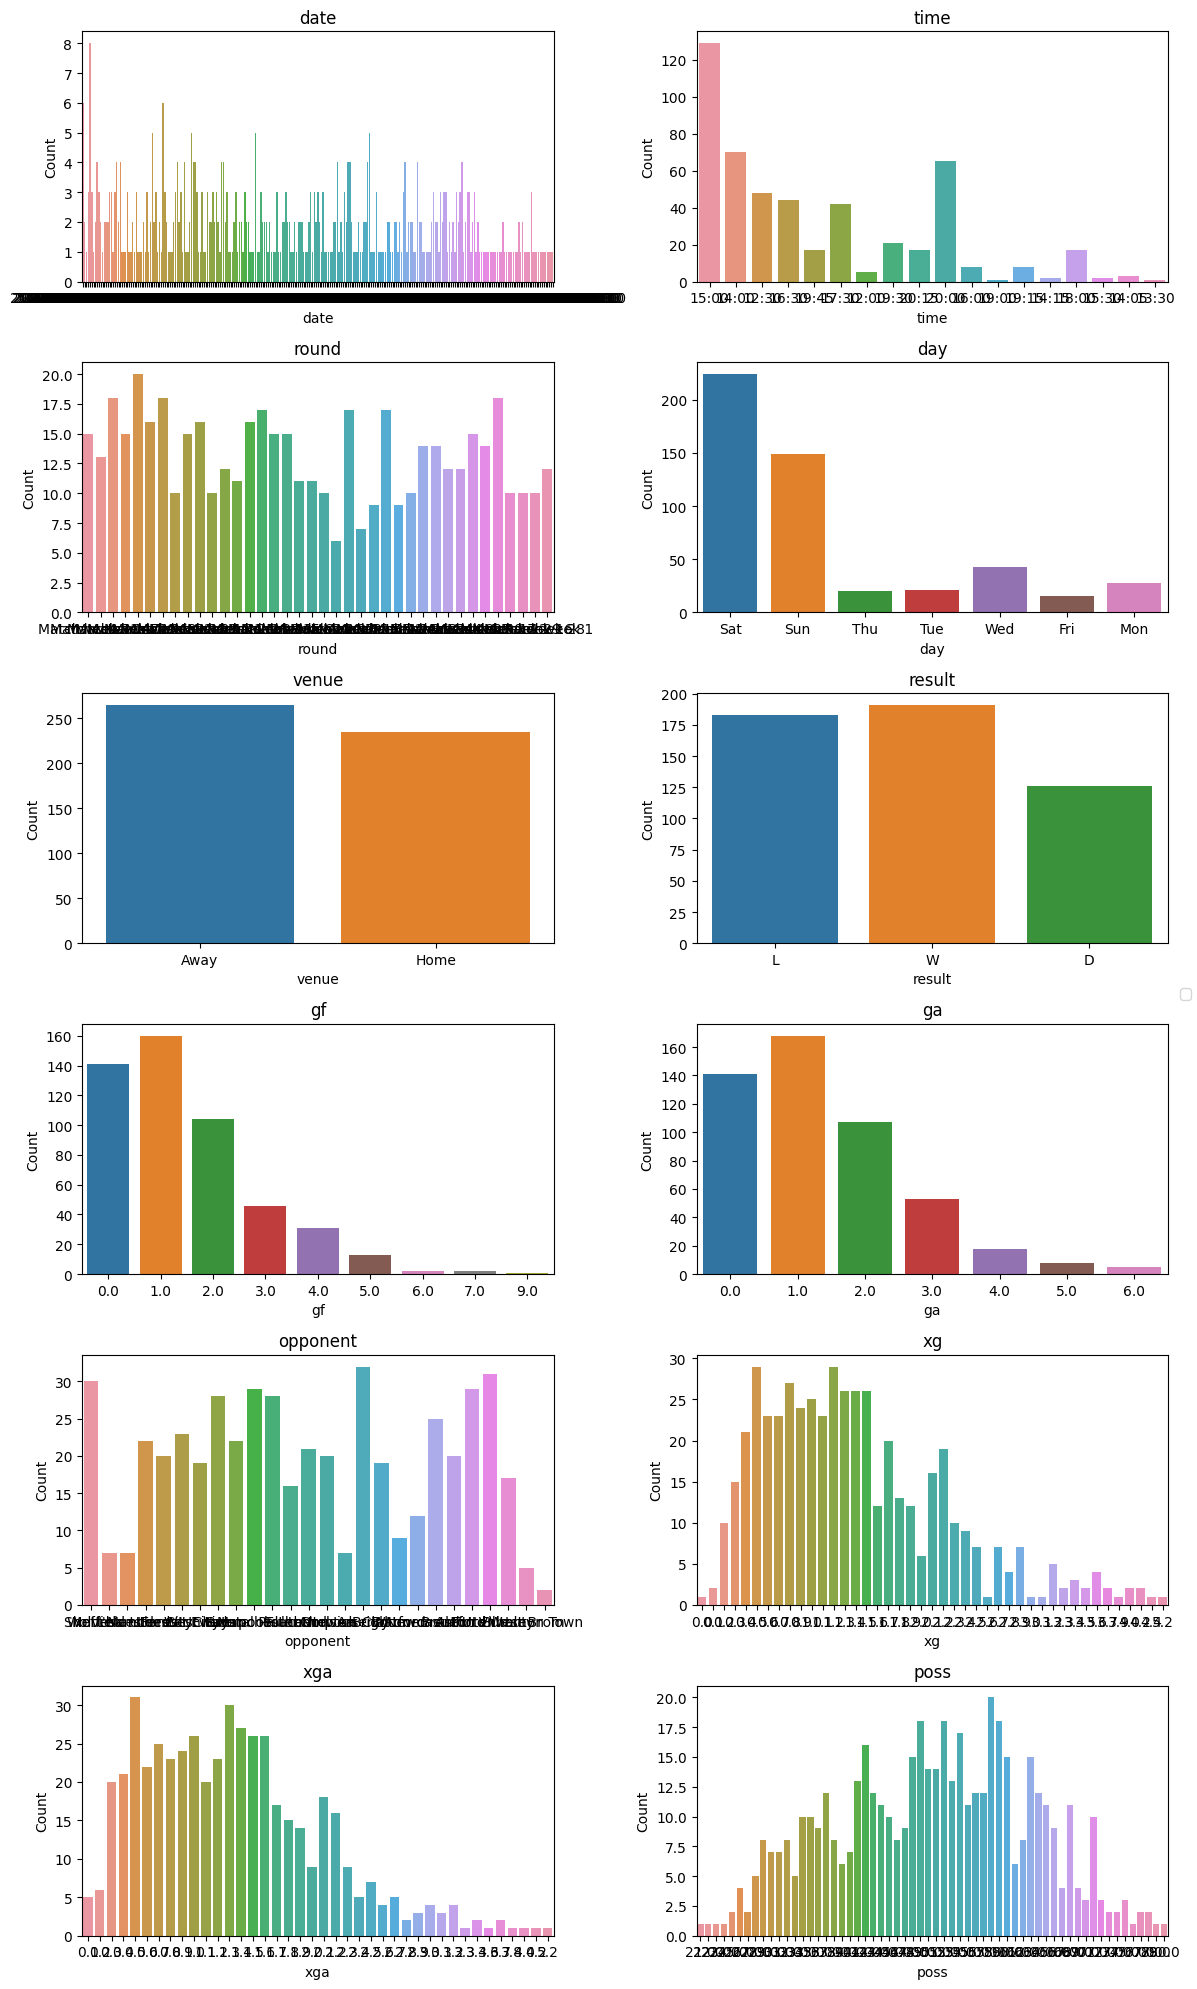

In [22]:
# Tạo subplot
fig, axs = plt.subplots(6, 2, figsize=(12, 20))

# Chỉ mục cho vị trí của biểu đồ trong subplot
row_index = 0
col_index = 0

# Lặp qua từng đặc trưng và vẽ biểu đồ
for feature, ax in zip(sample_df.keys(), axs.flat):
    # Tạo biểu đồ cột đếm số lượng
    sns.countplot(x=feature, data=sample_df, ax=ax)
    ax.set_title(feature)
    # ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Kiểm tra vị trí của biểu đồ trong subplot để điều chỉnh chỉ mục
    if col_index < 2:
        col_index += 1
    else:
        row_index += 1
        col_index = 0
# Tạo bảng chú thích bên phải
handles, labels = axs[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='right')

# Tự động căn chỉnh và hiển thị biểu đồ
fig.tight_layout()
plt.show()